<a href="https://colab.research.google.com/github/Ashakorakooti/Asha/blob/main/Customer_Behavior_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install kagglehub numpy pandas matplotlib seaborn

**Data Collection and Preprocessing**

In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhanupratapbiswas/customer-behavior-analysis")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-behavior-analysis


In [13]:
import os

# List all files in the dataset directory
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))


/kaggle/input/customer-behavior-analysis/ecommerce_customer_data_large.csv
/kaggle/input/customer-behavior-analysis/ecommerce_customer_data_custom_ratios.csv


In [14]:
import pandas as pd

# Load the correct CSV file
file_path = "/kaggle/input/customer-behavior-analysis/ecommerce_customer_data_large.csv"
df = pd.read_csv(file_path)

# Preview the first few rows
df.head()


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [15]:
import pandas as pd

# Load dataset
file_path = "/kaggle/input/customer-behavior-analysis/ecommerce_customer_data_large.csv"
df = pd.read_csv(file_path)

# Preview
print("🔹 First 5 rows:")
display(df.head())

# Column names
print("\n🔹 Column names:")
print(df.columns)

# Dataset info
print("\n🔹 Data types and null values:")
df.info()

# Missing values count
print("\n🔹 Missing values per column:")
print(df.isnull().sum())

# Drop duplicate rows
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
final_rows = df.shape[0]
print(f"\n✅ Removed {initial_rows - final_rows} duplicate rows.")

# Optional: convert object columns to datetime (if any date columns present)
# For example:
# df['signup_date'] = pd.to_datetime(df['signup_date'])

# Handle missing values (if any)
# Strategy: Fill numerical with mean, categorical with mode

for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].mean(), inplace=True)

print("\n✅ Missing values handled.")

# Final check
print("\n🔹 Final null check:")
print(df.isnull().sum())

# Save cleaned version (optional)
# df.to_csv("Cleaned_Ecommerce_Data.csv", index=False)


🔹 First 5 rows:


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0



🔹 Column names:
Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')

🔹 Data types and null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name  

**EDA**

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [34]:
# 1. 🔹 Summary statistics for numeric columns
print("📌 Summary Statistics:")
display(df.describe())

📌 Summary Statistics:


,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.00000
mean,25017.632092,254.742724,3.004936,2725.385196,43.798276,0.500824,43.798276,0.20052
std,14412.515718,141.738104,1.414737,1442.576095,15.364915,0.450131,15.364915,0.40039
min,1.000000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.00000
25%,12590.000000,132.000000,2.000000,1476.000000,30.000000,0.000000,30.000000,0.00000
50%,25011.000000,255.000000,3.000000,2725.000000,44.000000,0.500824,44.000000,0.00000
75%,37441.250000,377.000000,4.000000,3975.000000,57.000000,1.000000,57.000000,0.00000
max,50000.000000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.00000


In [35]:
# 2. 🔹 Unique value counts for categorical columns
print("\n📌 Unique value counts for object (categorical) columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head(), "\n")


📌 Unique value counts for object (categorical) columns:
Purchase Date: 249728 unique values
Purchase Date
2021-11-30 18:52:48    2
2023-04-06 14:42:37    2
2022-10-22 20:47:44    2
2021-08-16 07:21:26    2
2022-10-16 00:42:50    2
Name: count, dtype: int64 

Product Category: 4 unique values
Product Category
Electronics    62630
Clothing       62581
Home           62542
Books          62247
Name: count, dtype: int64 

Payment Method: 3 unique values
Payment Method
Credit Card    83547
PayPal         83441
Cash           83012
Name: count, dtype: int64 

Customer Name: 39878 unique values
Customer Name
Michael Johnson    119
Michael Smith      116
Michael Brown      106
Michael Jones       94
James Smith         93
Name: count, dtype: int64 

Gender: 2 unique values
Gender
Male      125676
Female    124324
Name: count, dtype: int64 



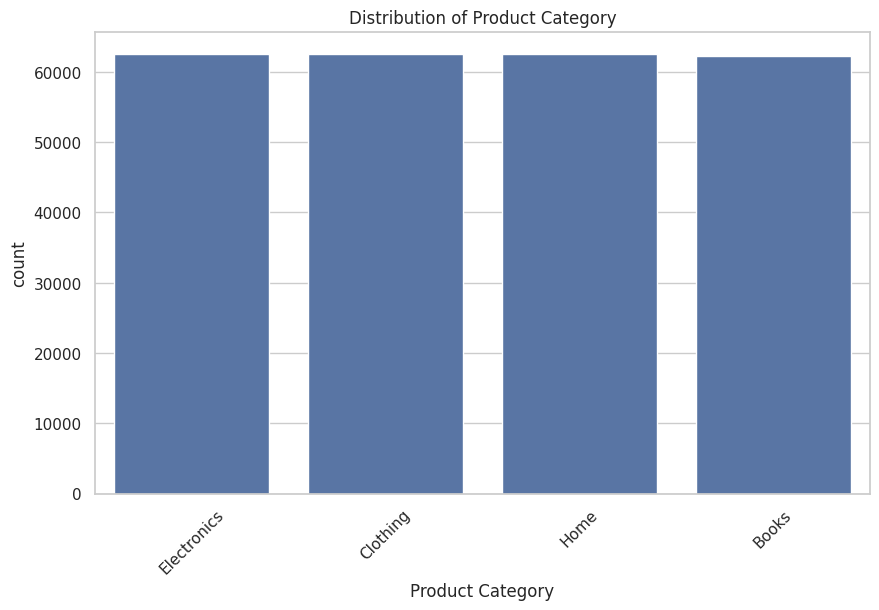

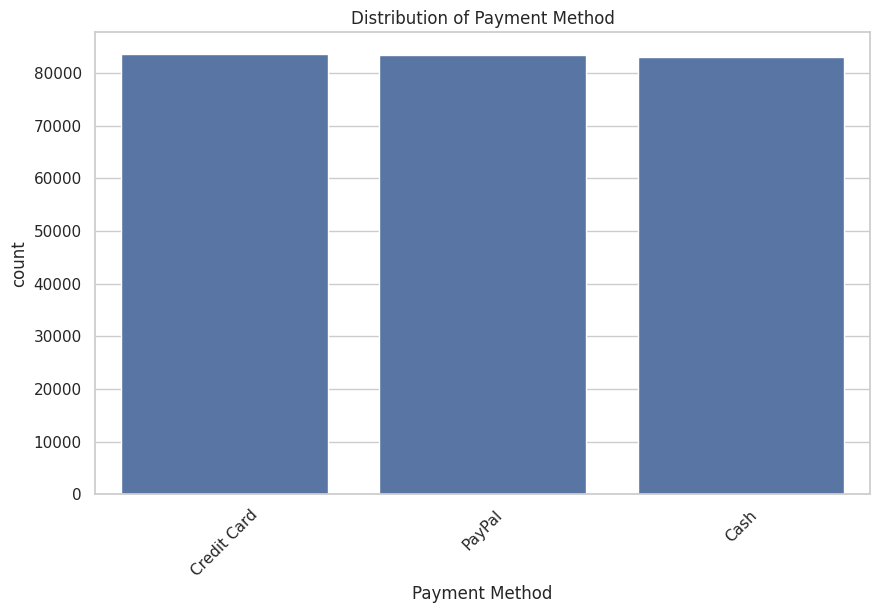

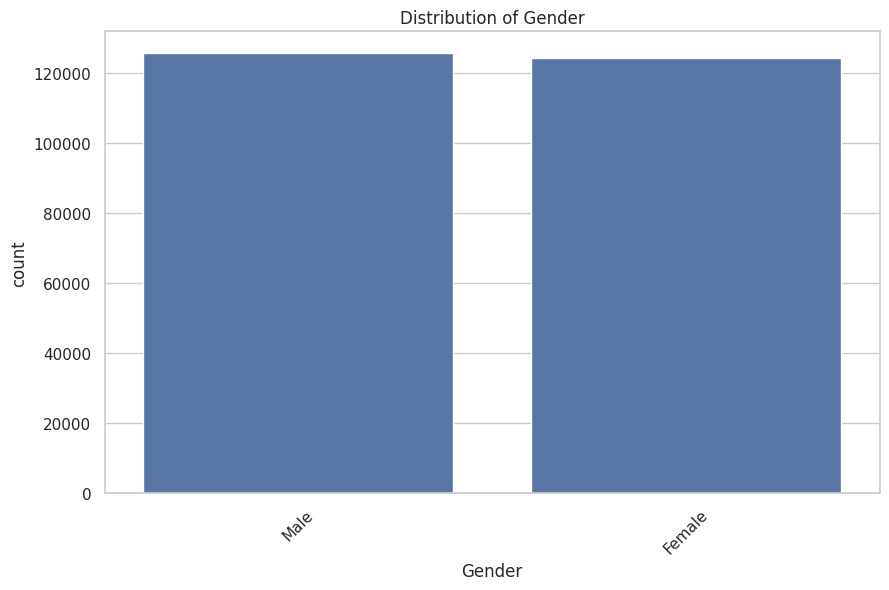

In [36]:
# 3. 🔹 Plot categorical distributions
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    if df[col].nunique() < 15:  # limit to avoid long charts
        plt.figure()
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45)
        plt.show()

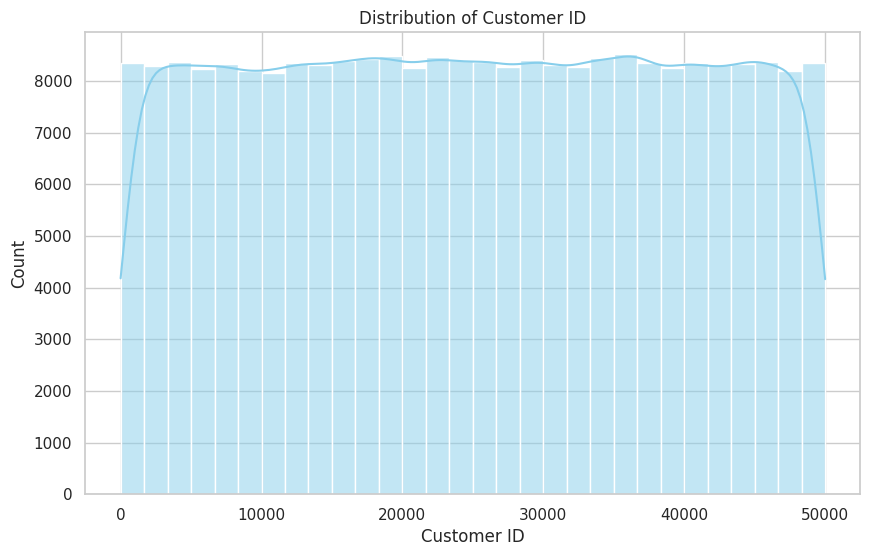

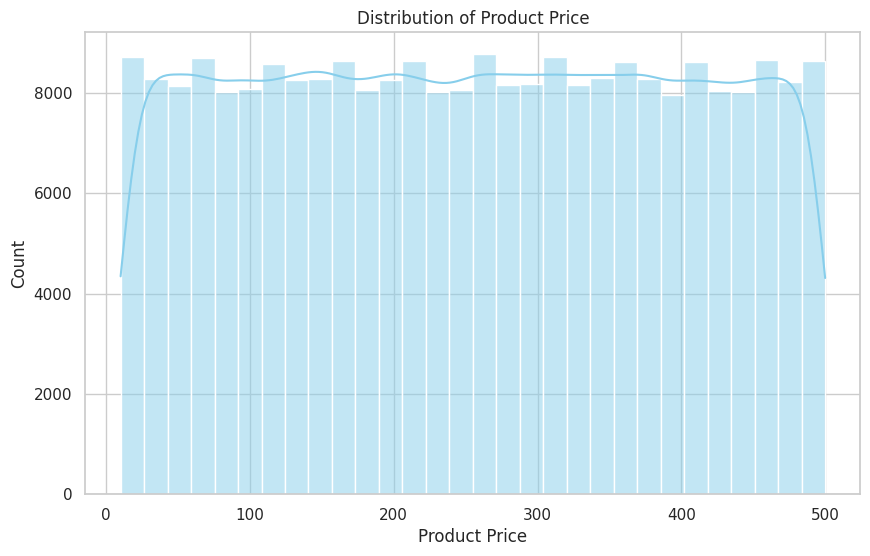

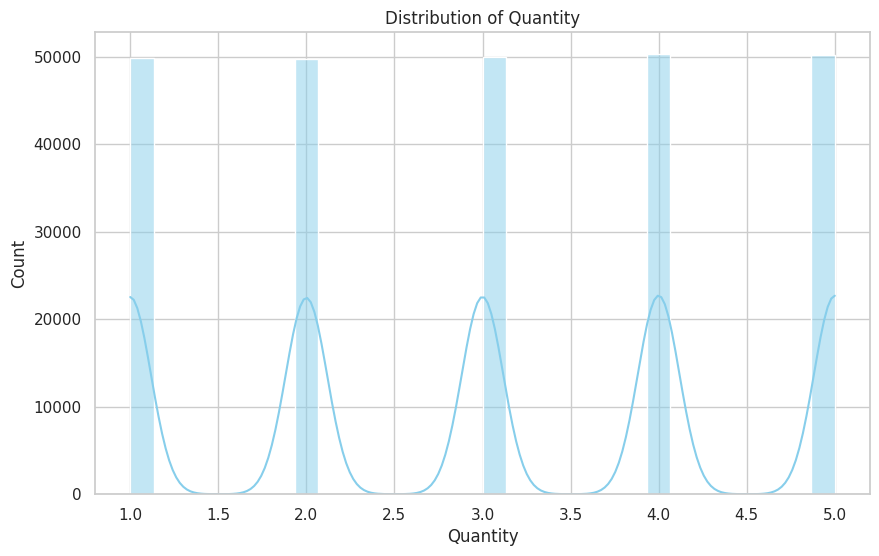

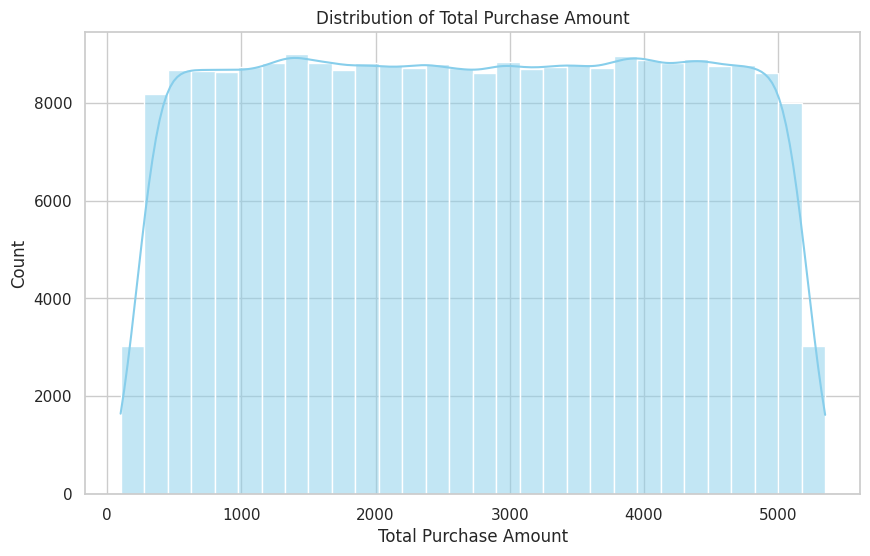

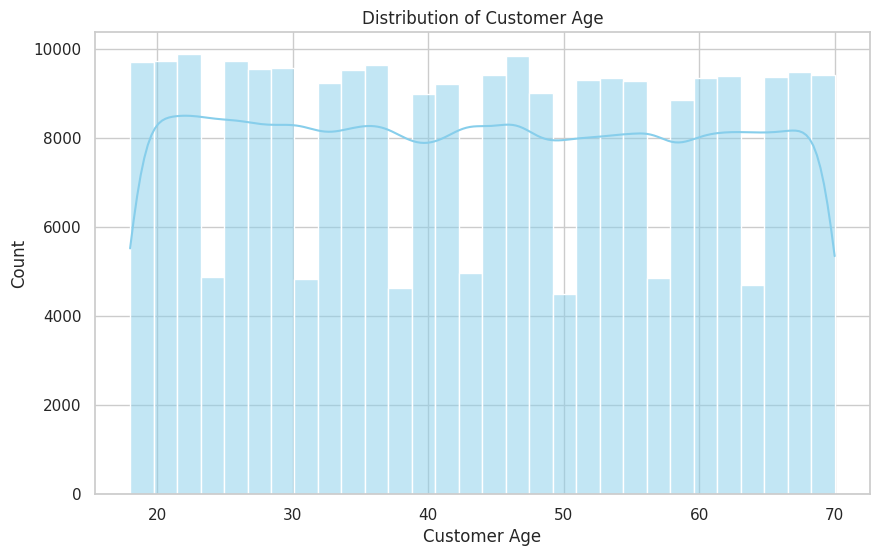

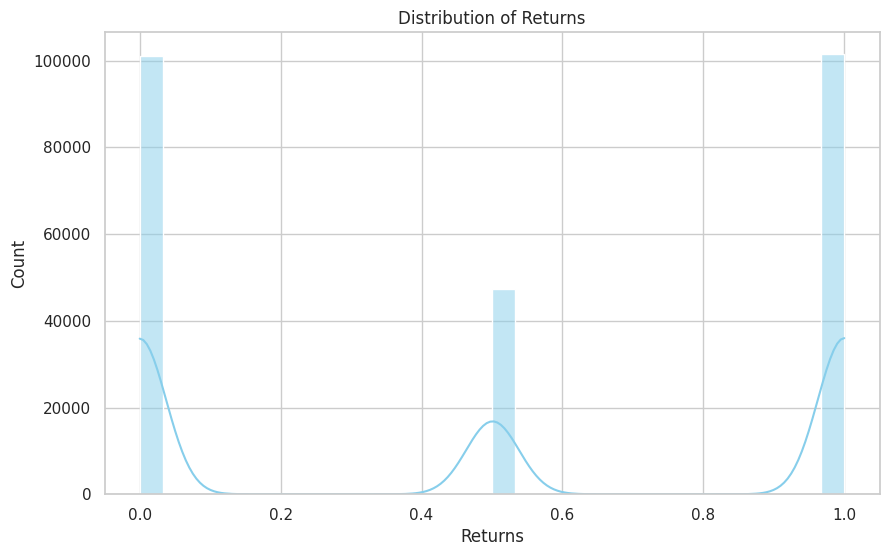

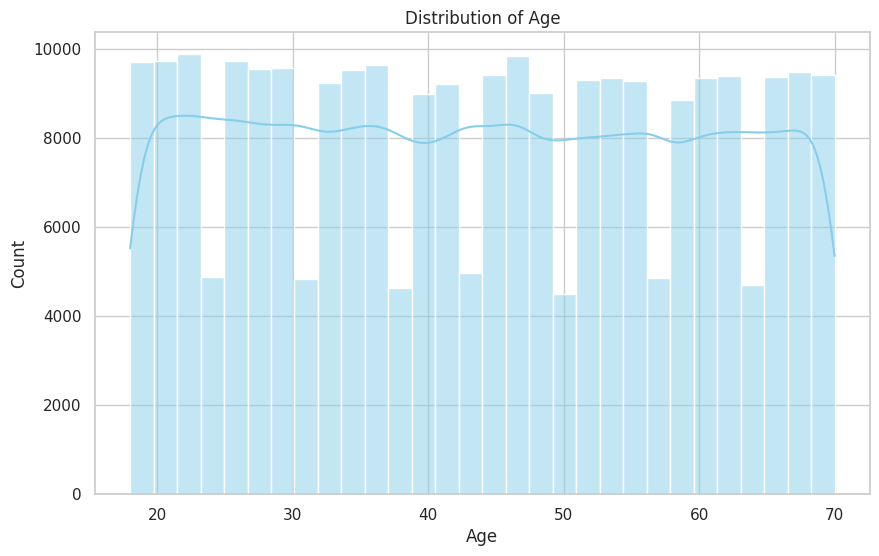

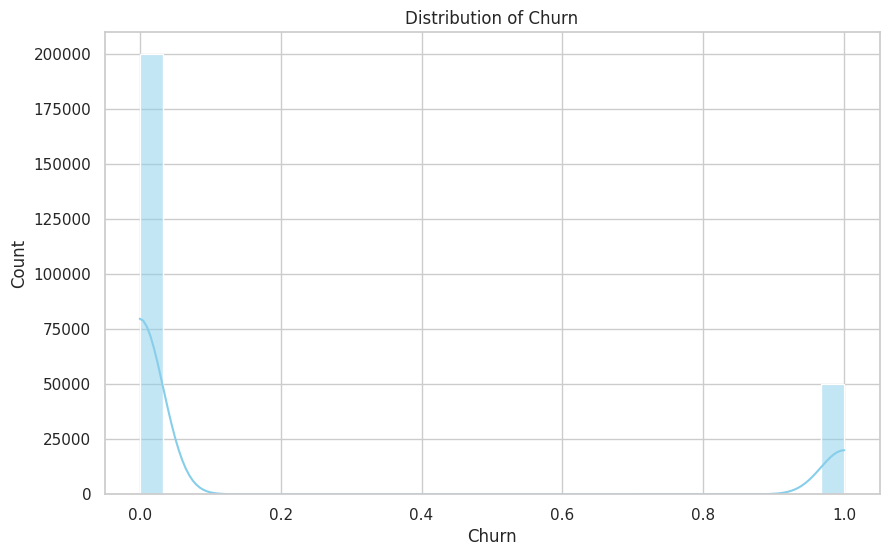

In [37]:
# 4. 🔹 Plot numeric distributions
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

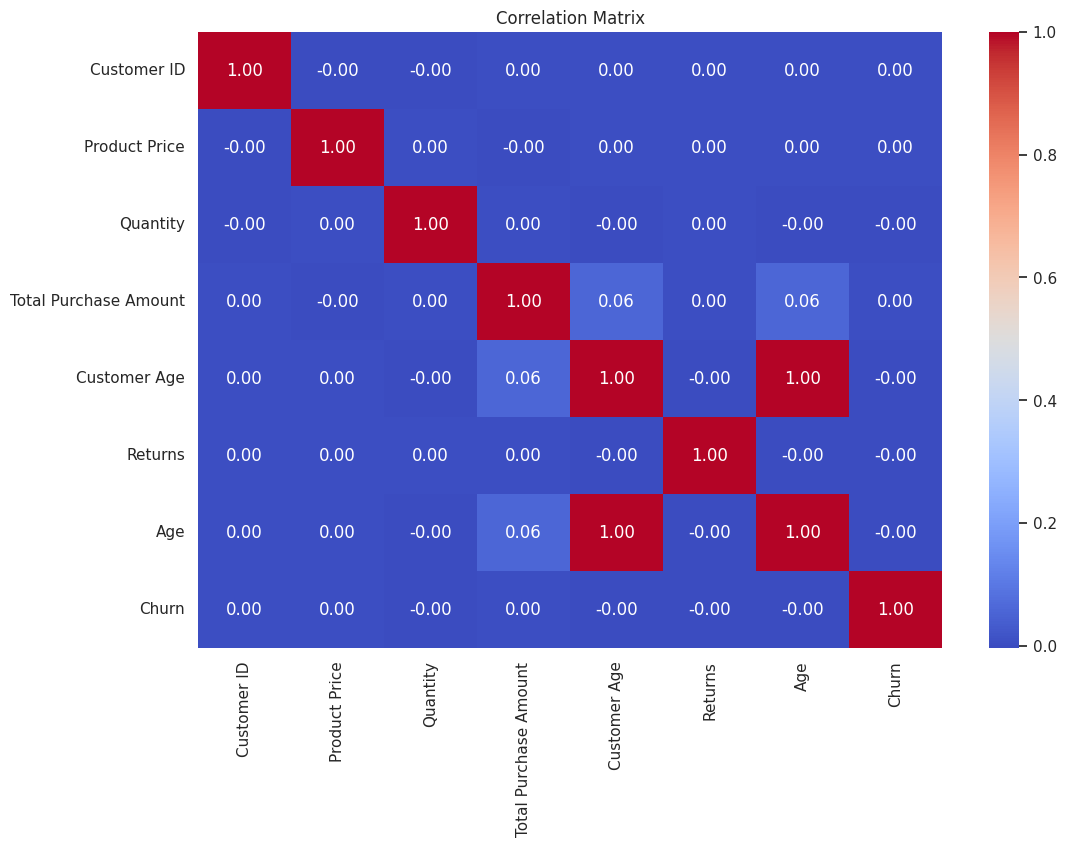

In [38]:
# 5. 🔹 Correlation heatmap (only numeric columns)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Visualization**

In [31]:
# Print the column names of the DataFrame
print(df.columns.tolist())

['Customer ID', 'Purchase Date', 'Product Category', 'Product Price', 'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age', 'Returns', 'Customer Name', 'Age', 'Gender', 'Churn', 'Age_Group']


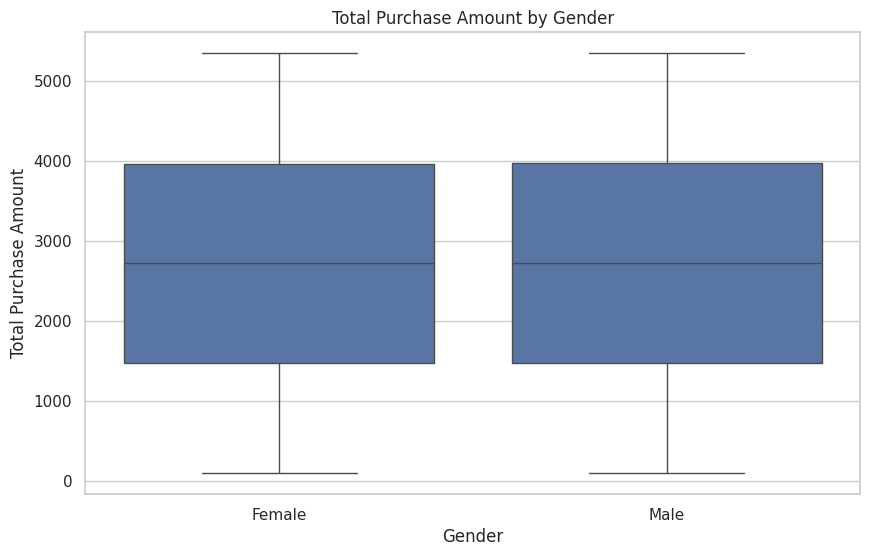

In [25]:
# Rename for easier reference (no changes needed as column names are fine)
df.rename(columns=lambda x: x.strip(), inplace=True)
# Use actual column names here
# 'Total Purchase Amount' is likely the spending column
spend_col = 'Total Purchase Amount'
age_col = 'Age'

# 1. Spending by Gender
sns.boxplot(data=df, x='Gender', y=spend_col)
plt.title(f"{spend_col} by Gender")
plt.show()

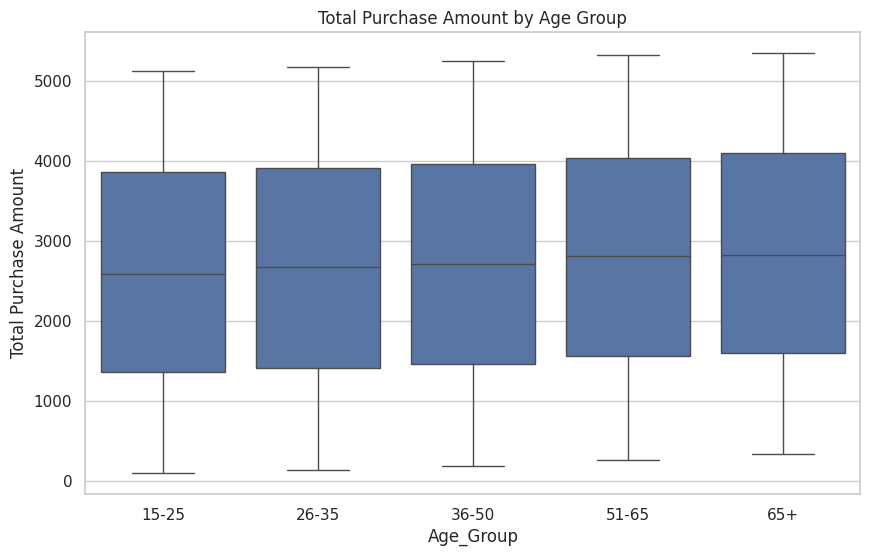

In [26]:
# 2. Spending by Age Group
df['Age_Group'] = pd.cut(df[age_col], bins=[15, 25, 35, 50, 65, 100],
                         labels=['15-25', '26-35', '36-50', '51-65', '65+'])

sns.boxplot(x='Age_Group', y=spend_col, data=df)
plt.title(f"{spend_col} by Age Group")
plt.show()

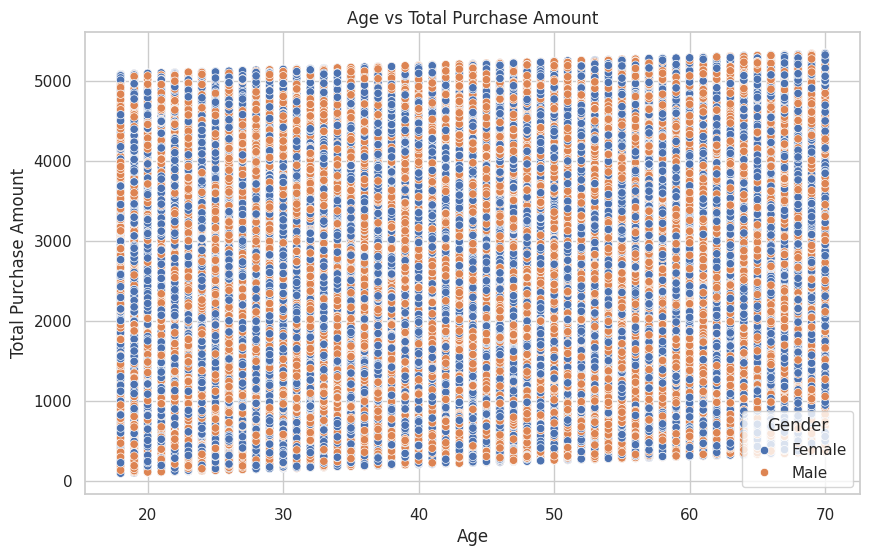

In [27]:
# 3. Age vs. Total Purchase Amount (no income equivalent)
sns.scatterplot(data=df, x=age_col, y=spend_col, hue='Gender')
plt.title(f"{age_col} vs {spend_col}")
plt.show()

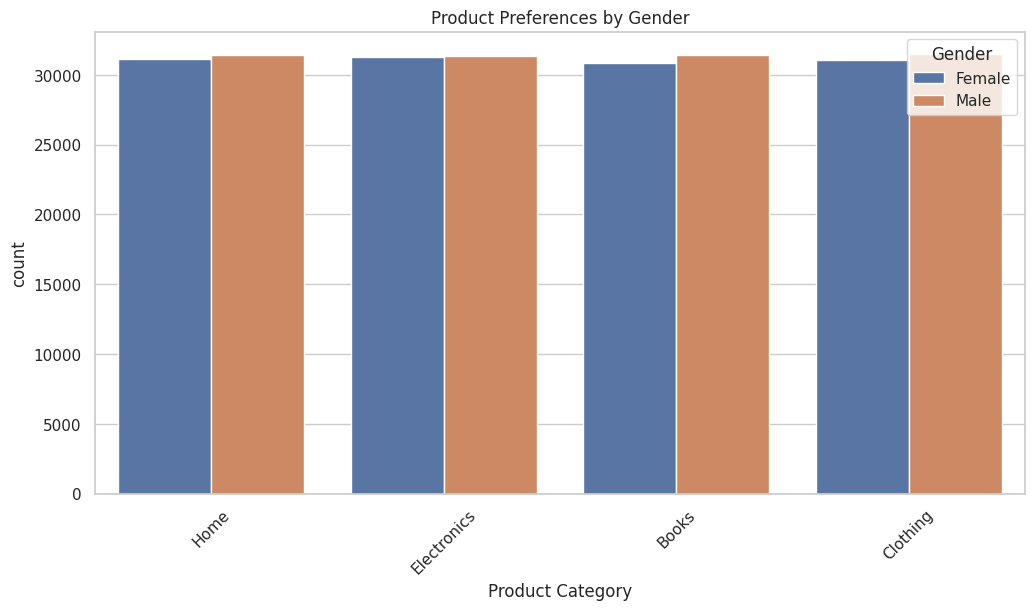

In [28]:
# 4. Product Category by Gender (Customer Type is not available)
plt.figure(figsize=(12,6))
sns.countplot(x='Product Category', hue='Gender', data=df)
plt.title("Product Preferences by Gender")
plt.xticks(rotation=45)
plt.show()

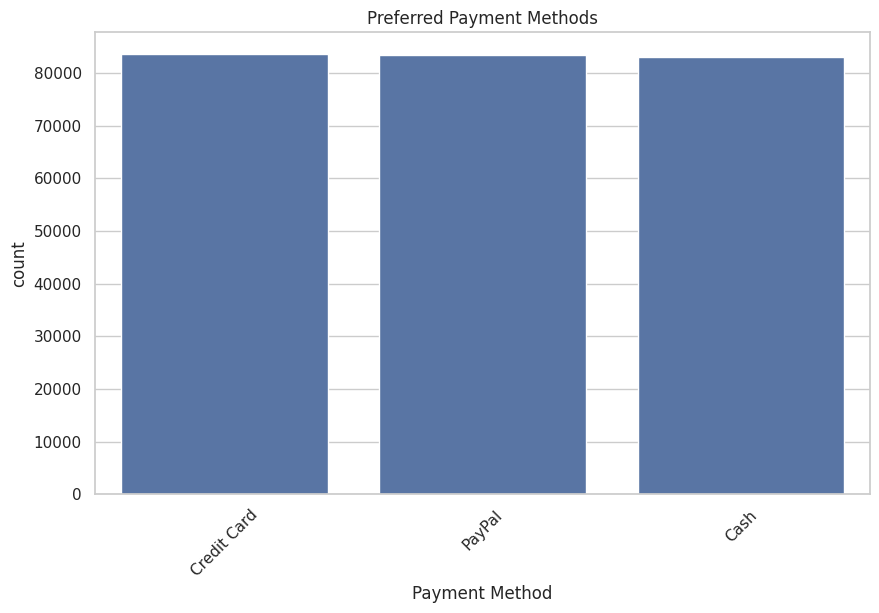

In [29]:
# 5. Payment Method Preferences
if 'Payment Method' in df.columns:
    sns.countplot(x='Payment Method', data=df, order=df['Payment Method'].value_counts().index)
    plt.title("Preferred Payment Methods")
    plt.xticks(rotation=45)
    plt.show()

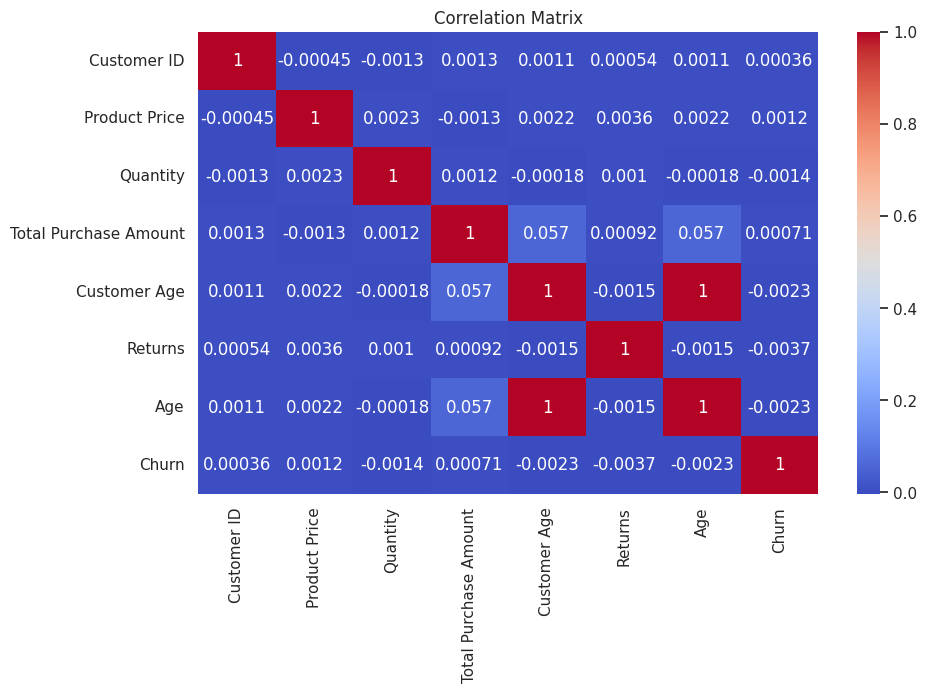

In [30]:
# 6. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()